In [1]:
import time
import math  # 수학 모듈
import numpy as np  # 넘파이
import pandas as pd  # 판다스
import matplotlib.pyplot as plt  # 그래프
from scipy import interpolate
from datetime import datetime  # 시계열
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [153]:
pc_path = "C:/k_digital/source/python_study/Final-Project-in-class/Data/Data.csv"
pc_df = pd.read_csv(pc_path)

In [2]:
fanuc_path = "C:/k_digital/source/python_study/Final-Project-in-class/Data/fanuc.csv"
fanuc_df = pd.read_csv(fanuc_path)

In [80]:
def trans_timestamp_with_ms(df):
    for i in range(len(df.time)):
        df.time[i] = datetime.fromtimestamp(math.trunc(df.time[i]/1000000000))
    print(df.head())

In [81]:
trans_timestamp_with_ms(fanuc_df)

C:\Users\minim\AppData\Local\Temp\ipykernel_21908\3370082672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.time[i] = datetime.fromtimestamp(math.trunc(df.time[i]/1000000000))


                  time  GW_WHEEL_REMAIN  Macual_Automatic_Mode  \
0  2022-11-04 16:39:48          39.6198                      0   
1  2022-11-04 16:39:49          39.6198                      0   
2  2022-11-04 16:39:50          39.6198                      0   
3  2022-11-04 16:39:51          39.6198                      0   
4  2022-11-04 16:39:52          39.6198                      0   

   RW_DRESSING_INTERVAL  RW_WHEEL_REMAIN  Status_of_automatic_operation  \
0                   630          10.1468                              0   
1                   630          10.1468                              0   
2                   630          10.1468                              0   
3                   630          10.1468                              0   
4                   630          10.1468                              0   

   Status_of_axis_movement  
0                        0  
1                        0  
2                        0  
3                        0  
4      

In [82]:
tot_time = pd.date_range(start='2022-11-04 16:39:48', end='2023-01-10 22:23:47', freq='S')
time_df = pd.DataFrame(tot_time, columns=['time'])

In [84]:
fanuc_df = pd.concat([fanuc_df, time_df], ignore_index=True)
fanuc_df.drop_duplicates(['time'], keep='first', ignore_index=True, inplace=True)
fanuc_df.set_index('time', inplace=True)
fanuc_df.sort_index(ascending=True, inplace=True)

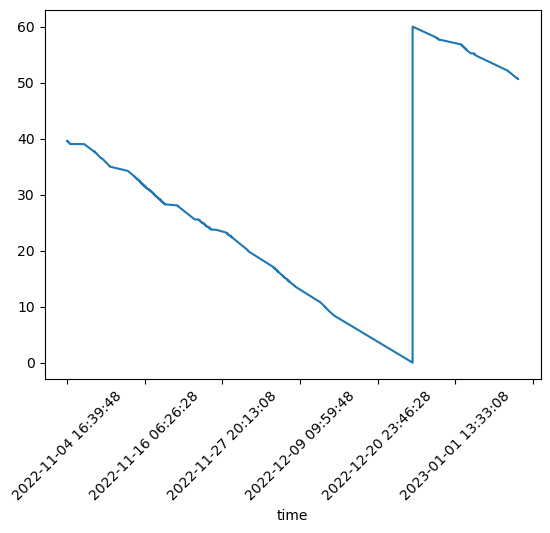

In [3]:
ax = fanuc_df.set_index('time').GW_WHEEL_REMAIN.plot(rot=45)

In [4]:
fanuc_df.to_csv("Data/fanuc.csv", index=False)